In [5]:
#importing packages
import pandas as pd
import json
import glob
#creating path
path1 = './*.json'
#obtaining files using glob
all_files = glob.glob(path1)
#setting the job titles
job_title=['big data','block chain','data analyst','data scientist','deep learning','machine learning','nlp','neural networks','reinforcement learning','time series']
#place to store the dataframes
dfs = []
# to change the name of the job title
count=0
count2=0
#for loop to create dataframe and include job title
for i in all_files:
    count2+=1
    f = open(i)
    data = json.load(f)
    df = pd.json_normalize(data,record_path=['jobs_results'])
    df['file']=job_title[count]  
    dfs.append(df)
    if count2 ==5:
        count +=1
        count2=0
#concating and saving result
merged_df = pd.concat(dfs, ignore_index=True)
merged_df.to_csv('results.csv', index=False)


In [6]:
#reading the results
df=pd.read_csv('results.csv')


In [ ]:
#color palette
color=['#CAC4CE','#FFCCC9','#B4C5E4','#C9DCB3','#B4A6AB','#E3D0D8','#C3B299','#BDC4A7','#95AFBA','#A9B4C2']

Map Graph

In [13]:
#for loop to obtain the states that the jobs are located in
for i in range(len(df['location'])):
    df['location'][i]=df['location'][i].split(',')
    if len(df['location'][i])==2:
        df['location'][i]=df['location'][i][1]
    else:
        df['location'][i]=df['location'][i][0]

    df['location'][i]=df['location'][i].replace(' ','')
    
    

In [108]:
import plotly.express as px

#creating a dataframe that shows the count of each state
locati = df.groupby(['location','file']).size().reset_index()
locati.columns = ['location','file','count']

# Create the choropleth map using the state abbreviations as the location data
fig = px.choropleth(locati, locations='location', locationmode='USA-states', color='count',
                    scope='usa', color_continuous_scale='Purples',animation_frame='file')

#writing the html file
fig.write_html('map.html')


Via Graph

In [109]:
#new dataframe showing the counts of each website
via_counts = df.groupby(['via', 'file']).size().reset_index()
via_counts.columns = ['via', 'file', 'count']
#creating a sunburst plot and saving it
fig = px.sunburst(via_counts, path=['file', 'via'], values='count',color_discrete_sequence=color)
fig.show()
fig.update_layout(title='Job ')
fig.write_html('graph1.html')

Schedule Type

In [106]:
import plotly.express as px

#new dataframe grouping by schedule type and file
hourly_count = df.groupby(["detected_extensions.schedule_type", "file"]).size().reset_index(name="count")


# Create the bar plot with animation frame on job type and a set color
fig = px.bar(hourly_count, x="detected_extensions.schedule_type", y="count",animation_frame='file',
             template="plotly_white", height=800, title="Job offer types",color_discrete_sequence=['#B4A6AB'])

#setting the lables
fig.update_layout(xaxis_title="Schedule Type", yaxis_title="Count")

fig.show()
fig.write_html('schedule.html')

Experience

In [116]:
#starting new dataframe in which we will obtain the info from the job_highlights column
trial2=df['job_highlights'].apply(pd.Series)
#dropping nas and resetting index
trial2=trial2.dropna()
trial2=trial2.reset_index()
#stating the job type
trial2[1]=df['file']
#extracting data function
def extract_data(row):
    data_list = eval(row[0])
    return {d.get('title', ''): d.get('items', []) for d in data_list}
# calling our new dataframe to extract data
new_data = trial2.apply(extract_data, axis=1)
# inserting it in new dataframe
new_df = pd.DataFrame(new_data.tolist())
# creating new column
new_df['file']=9
# adding our job types to it
for i in range(len(new_df['file'])):
    new_df['file'][i]=df['file'][i]



C:\Users\12023\AppData\Local\Temp\ipykernel_54660\2813653326.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
#dropping nas in the qualifications 
new_df=new_df.dropna(subset=['Qualifications'])
new_df=new_df.reset_index()

In [27]:
#function to obtain the years of experience needed for job listings
def get_count(file):
    #initializing two empty lists
    exp=[]
    data=[]
    #new dataframe using job type
    tt=new_df[new_df['file']==file]
    #dropping nas and resetting index
    tt = tt.dropna(subset=['Qualifications'])
    tt=tt.reset_index()
    #nested for loop that will look for experience in the lists
    for i in range(len(tt['Qualifications'])):
        for k in range(len(tt['Qualifications'][i])):
            if 'experience' in tt['Qualifications'][i][k]:
                exp.append(tt['Qualifications'][i][k])
    #finding the numeric value and adding it to a list
    for i in exp:
        res = [int(k) for k in i.split() if k.isdigit()]
        for m in res:
            data.append(m)
    #returning said list
    return(data)

In [29]:
#calling it for all of the job types
try1=get_count('data scientist')
try2=get_count('data analyst')
try3=get_count('big data')
try4=get_count('machine learning')
try5=get_count('nlp')
try6=get_count('deep learning')
try7=get_count('reinforcement learning')
try8=get_count('neural networks')
try9=get_count('block chain')
try10=get_count('time series')
jobs=['data scientist','data analyst','big data','machine learning','nlp','deep learning','reinforcement learning','neural networks','block chain','time series']
info=[try1,try2,try3,try4,try5,try6,try7,try8,try9,try10]

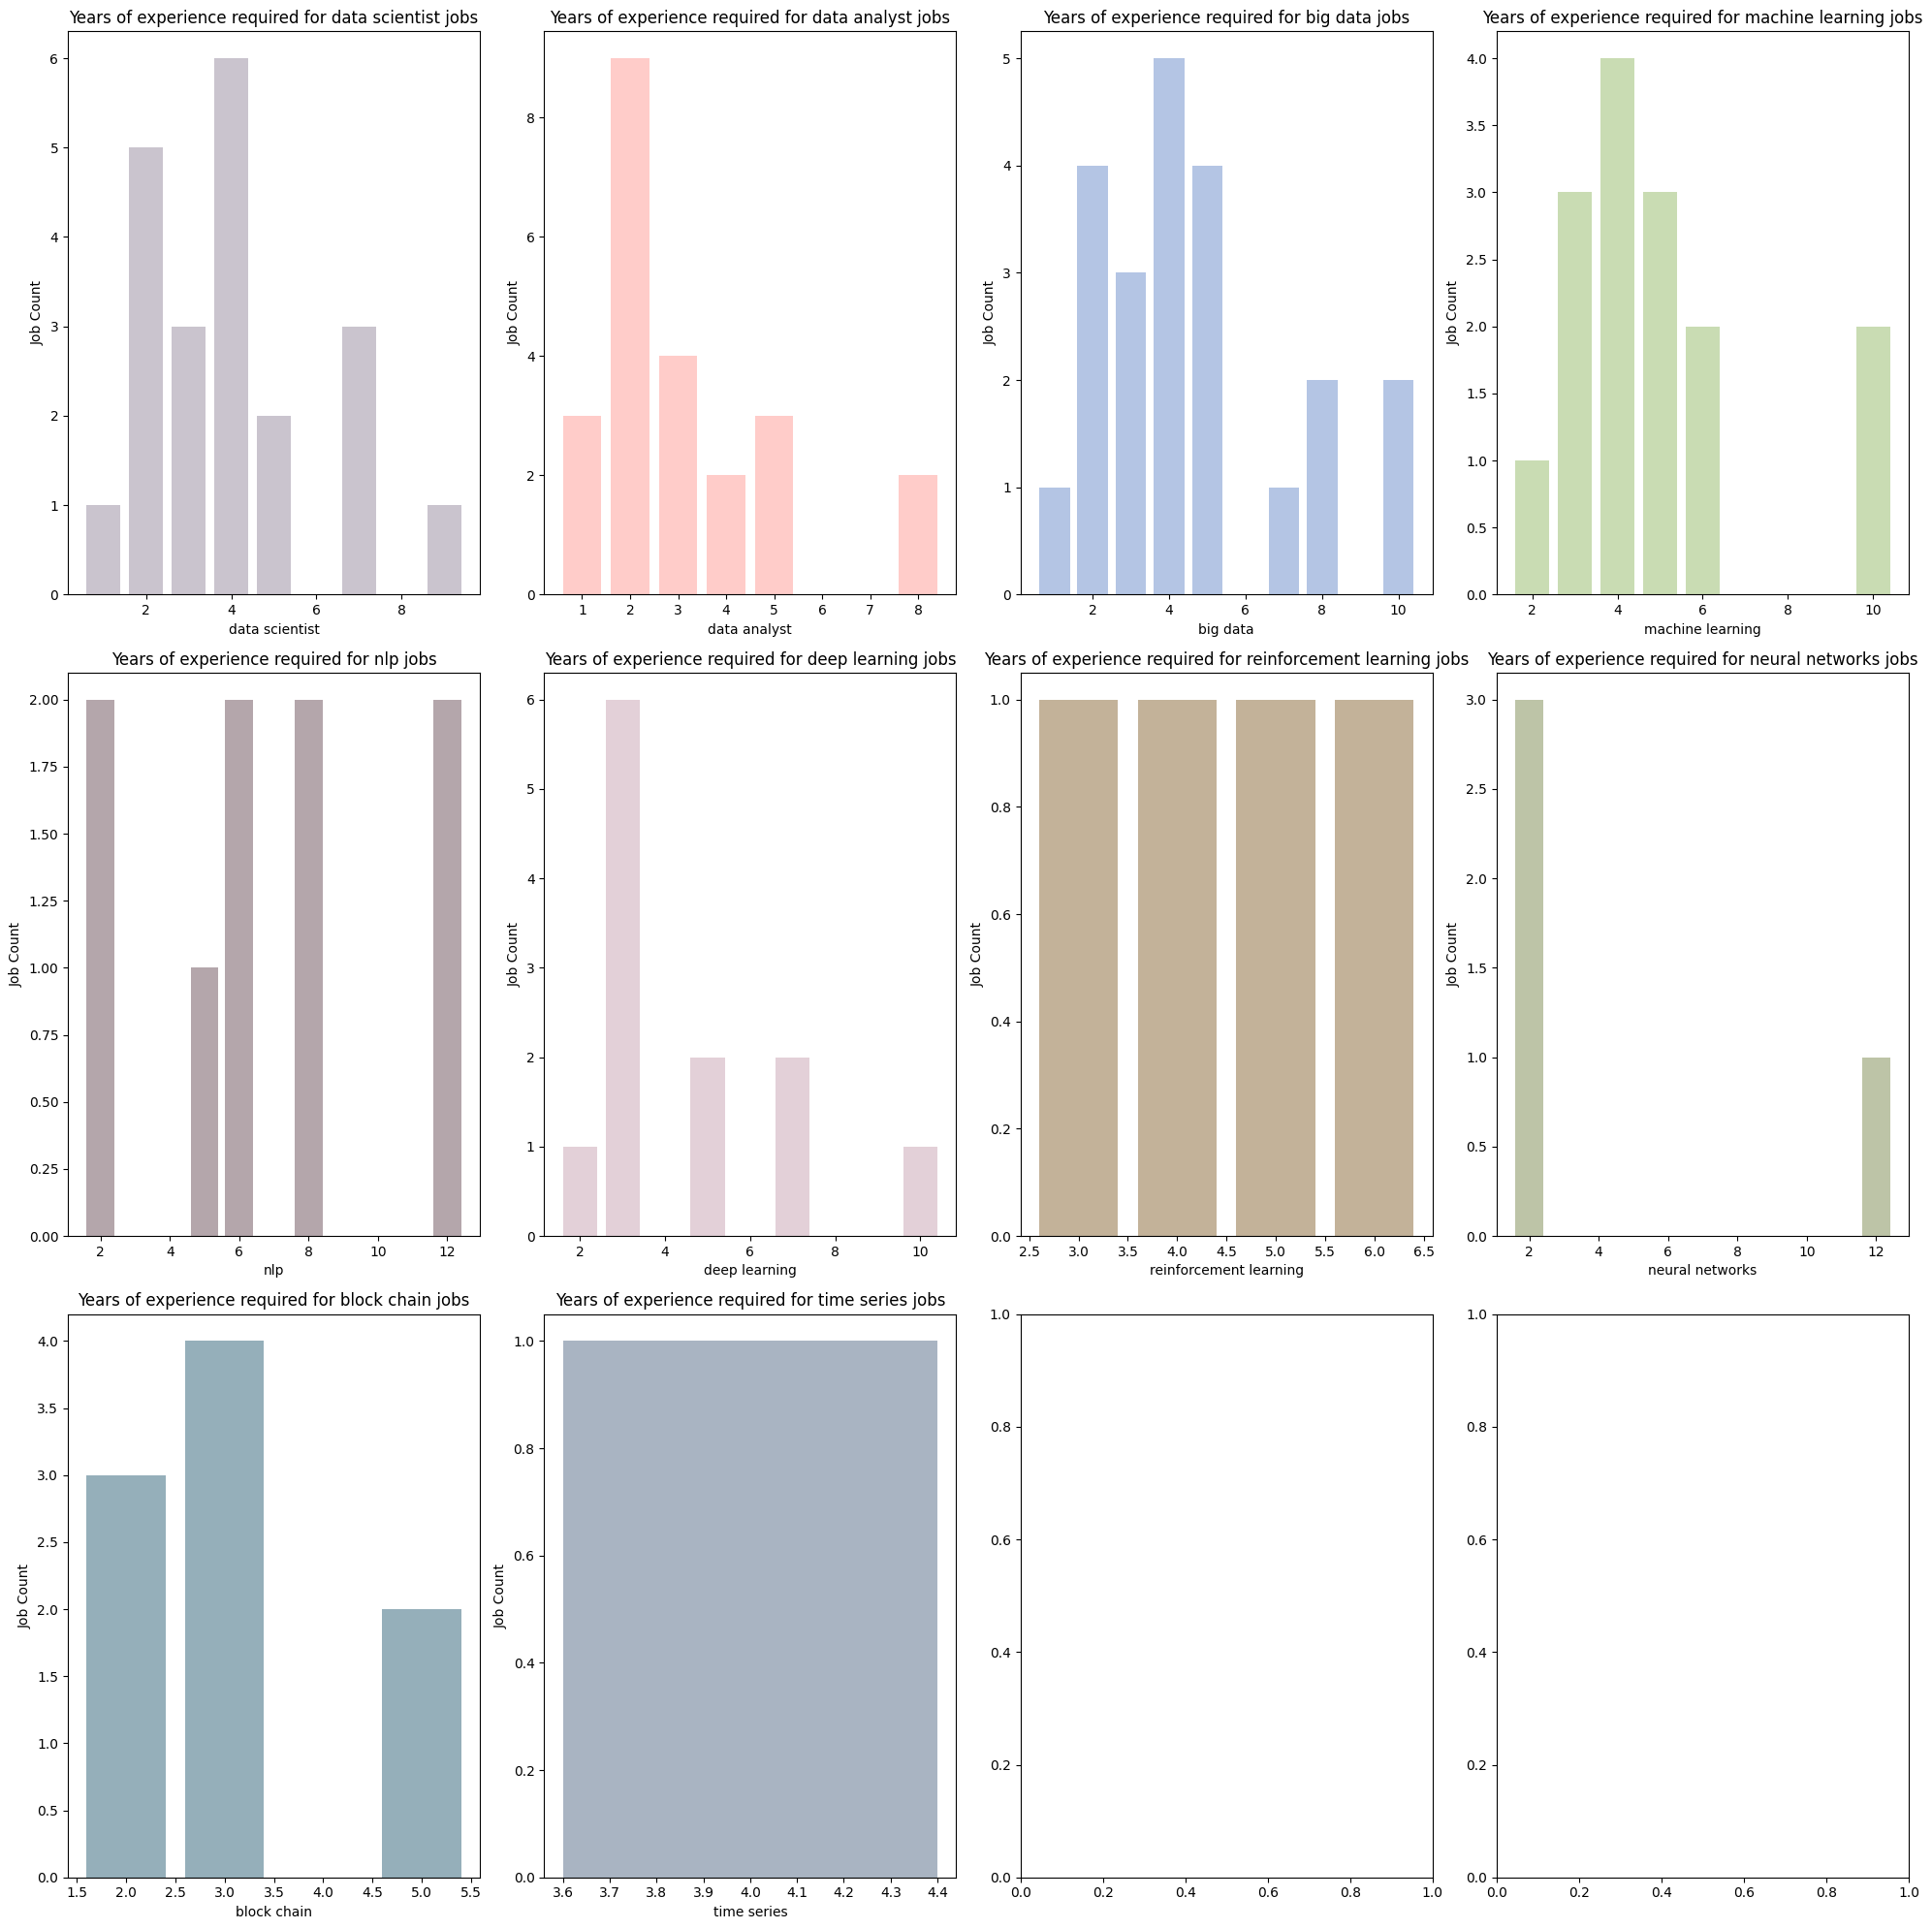

In [118]:
import matplotlib.pyplot as plt
from collections import Counter
#creating our subplots to store all of the plots
fig, axs = plt.subplots(3, 4, figsize=(20, 20))
axs = axs.flatten()
#for loop to create a graph for each job type
for i, data in enumerate(info):
    #obtaining counter showing the amount of times each item appears
    counts = Counter(data)
    #setting the graph in a subplot
    ax=axs[i]
    #creating the bars
    ax.bar(counts.keys(), counts.values(), color=color[i])
    # setting the lables
    ax.set_xlabel(jobs[i])
    ax.set_ylabel('Job Count')
    ax.set_title('Years of experience required for {} jobs'.format(jobs[i]))

#printing the graph 
plt.tight_layout()
plt.savefig('exp.png')
plt.show()


Network

In [33]:
#new dataframe using responsabilities
dft=new_df[['Responsibilities','file']]
data_list=[]
#obtaining all the different dataframes based on job type
for i in jobs:
    dfm=dft[dft['file']==i]
    dfm=dfm.dropna()
    dfm=dfm.reset_index()
    data_list.append(dfm)

In [34]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

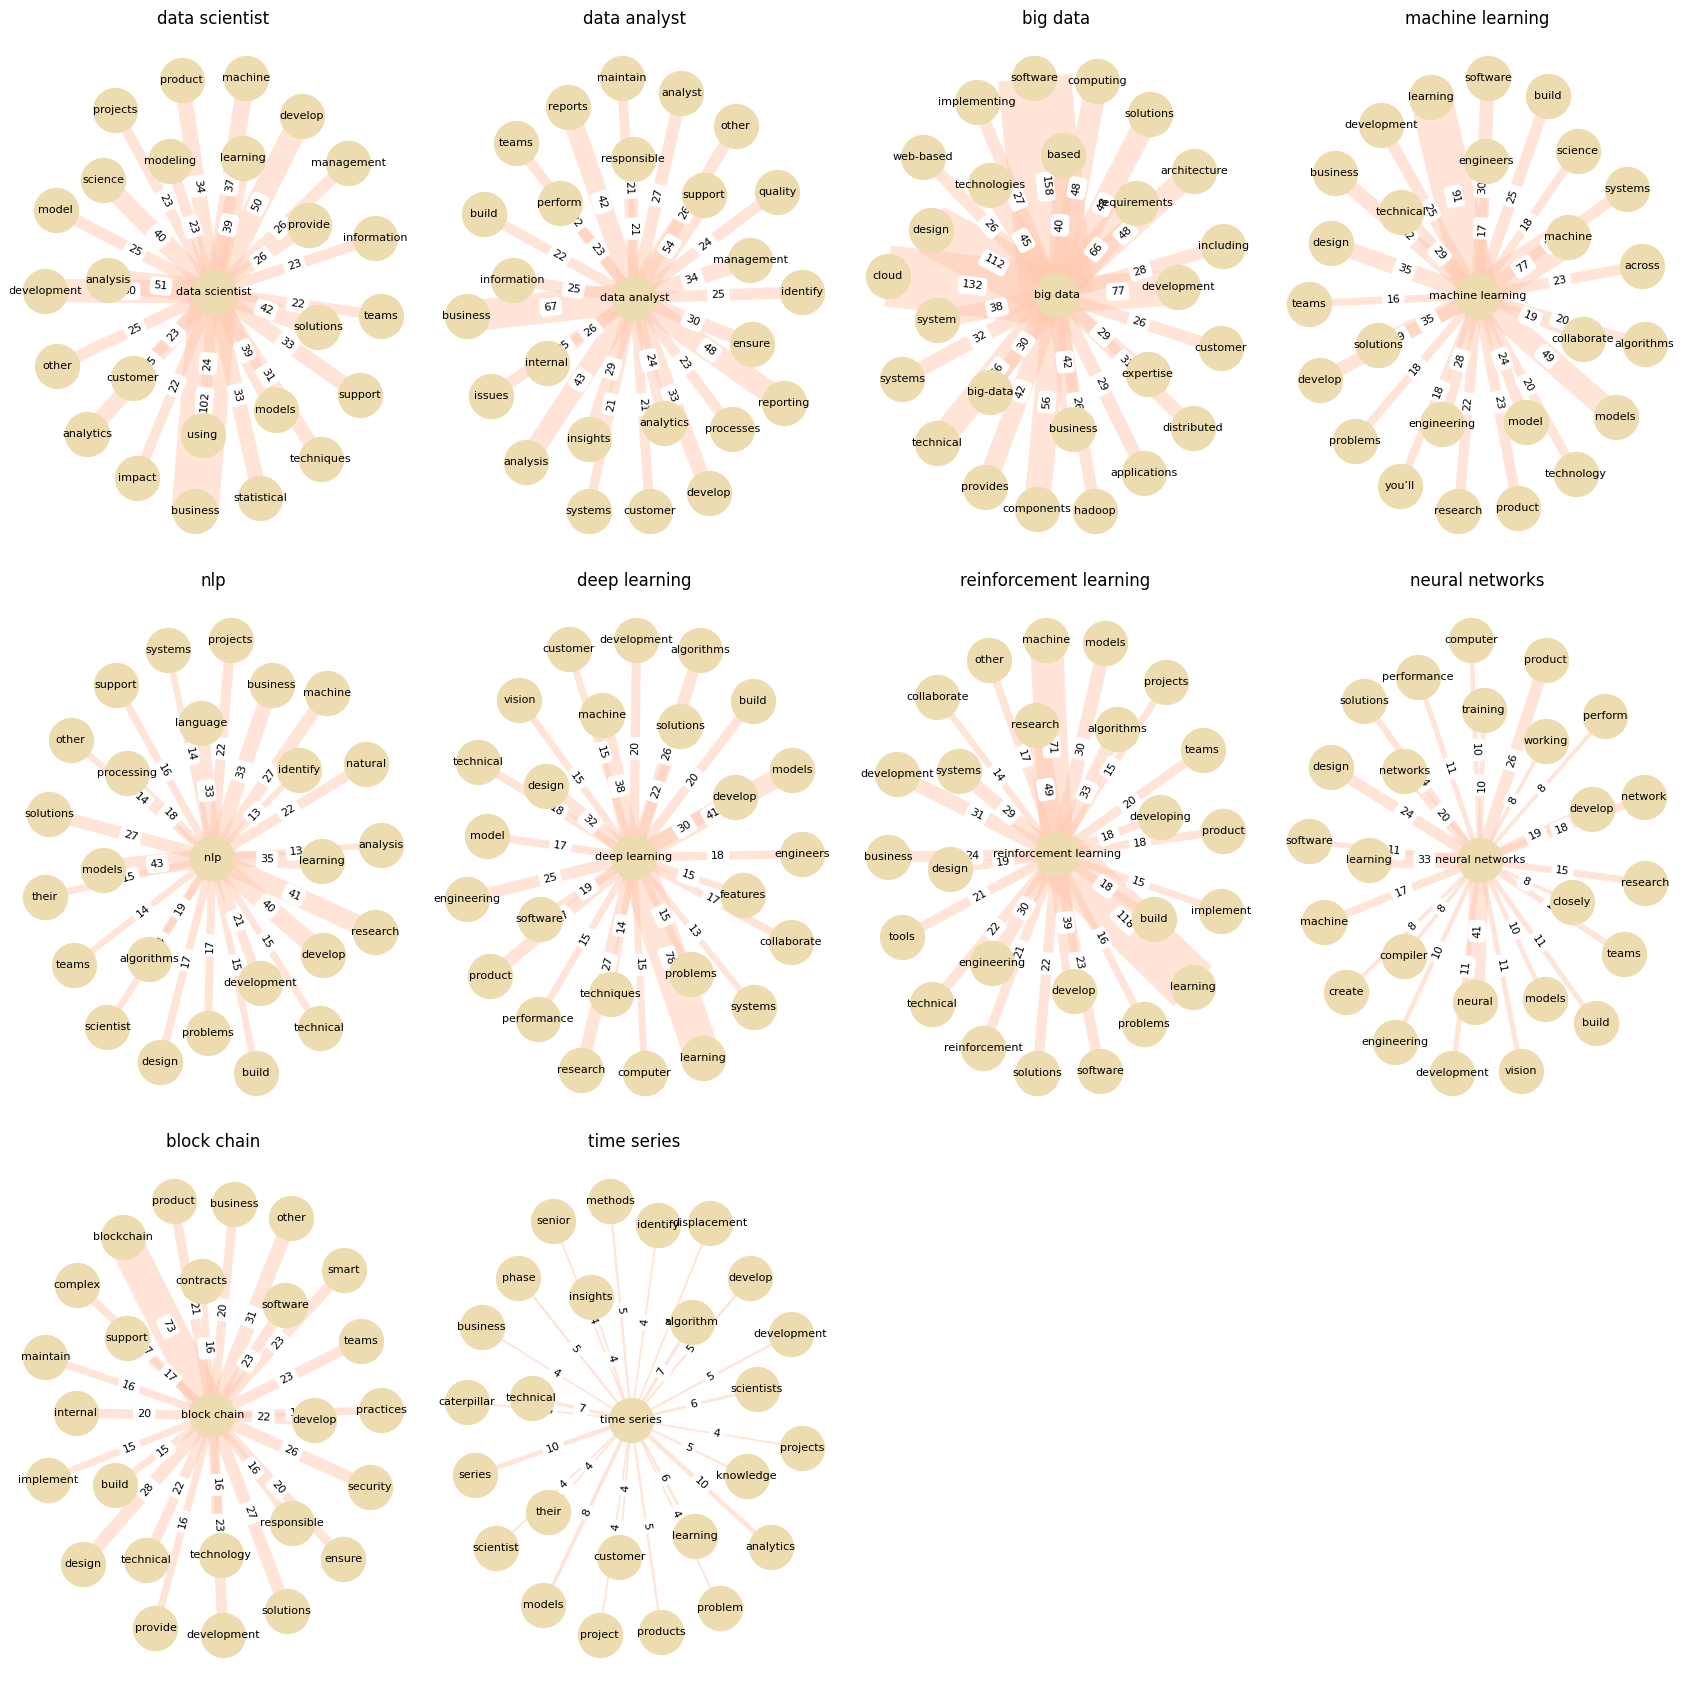

In [113]:
#creating subplots
fig, axs = plt.subplots(3, 4, figsize=(17, 17))
axs = axs.flatten()
#for loop to go through all job types
for love in range(len(data_list)):
    #empty list
    words=[]
    #for loop to obtain all words in dataframe
    for i in data_list[love]['Responsibilities']:
        for k in i:
            w=k.split(' ')
            for m in w:
                words.append(m)
    #empty list
    words2=[]
    #for loop to obtain all words longer than 4 characters
    for i in words:
        if len(i)>4:
            m=i.replace(',','')
            words2.append(m)
    #creating new dataframe using the list
    trial=pd.DataFrame(words2, columns=['words'])
    #new column that specifies job
    trial['data scientist']=jobs[love]
    #all words to undercase
    trial["words"] = trial["words"].str.lower()

    #obtaining word counts sorting them and obtaining the top 25
    pos_net=trial.groupby(["words",'data scientist']).size().reset_index(name="count")
    pos_net=pos_net.sort_values('count',ascending=False)
    pos_net=pos_net.head(25)
    # Create a graph from the filtered dataframe
    nodes = nx.from_pandas_edgelist(pos_net, 'words', 'data scientist', edge_attr='count')
    #obtaining the as spring layout
    pos = nx.spring_layout(nodes)
    #obtaining the node and specifying the size
    nx.draw_networkx_nodes(nodes, pos, node_size=1000,node_color='#ECDCB0',ax=axs[love])
    #obtaining the label and specifying the size
    nx.draw_networkx_labels(nodes, pos, font_size=8,ax=axs[love])
    #obtaining the connections, specifying the color and width, since we must have this in a website, the result cannot be to big so we decrease the width
    nx.draw_networkx_edges(nodes, pos, edge_color='#FFCAB1', width=pos_net['count']/3, alpha=0.5,ax=axs[love])
    # adding the count of the connections
    edge_labels = nx.get_edge_attributes(nodes, 'count')
    nx.draw_networkx_edge_labels(nodes, pos, edge_labels=edge_labels, font_size=8,ax=axs[love])
    # Set the title of the subplot
    axs[love].set_title(jobs[love])

# Remove the axis ticks and labels from all subplots
for ax in axs:
    ax.axis("off")

plt.tight_layout()
plt.savefig('network_plots.png')
plt.show()



Salary

In [110]:
# new sunburst diagram that focuses on salary
location_sal = df.groupby(['detected_extensions.salary', 'file']).size().reset_index()
location_sal.columns = ['via', 'file', 'count']
location_sal = location_sal.sort_values('file')

fig = px.sunburst(location_sal, path=['file', 'via'], values='count',color_discrete_sequence=color)
fig.show()
fig.update_layout(title='Job Salary ')
fig.write_html('graph2.html')